# Regularization

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Overfitting and Underfitting

Overfitting and Underfitting are two **crucial concepts in machine learning** and are the prevalent **causes for the poor performance** of a machine learning model. 

<img src="./images/overfitting.png"/>

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from helpers.plt_overfit import overfit_example, output
plt.style.use('helpers/deeplearning.mplstyle')

Output()

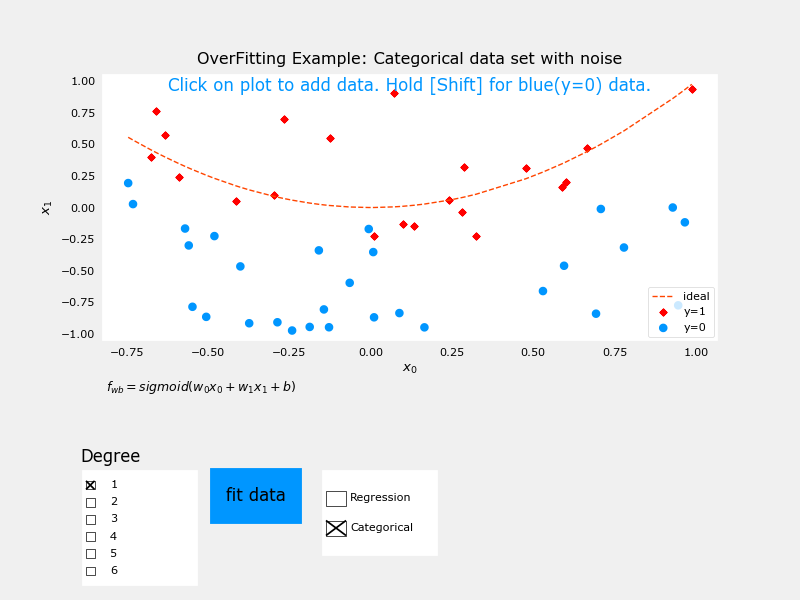

In [5]:
plt.close("all")
display(output)
ofit = overfit_example(False)
# lahko klikamo na graf in dodamo nove točke!

### What is Overfitting?

<img width="700" src="images/reg_01.png">

**Reasons for Overfitting**:
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model has a high variance
- The size of the training dataset used is not enough
- The model is too complex

Overfitting se zgodi zaradi low biasa in visoke variance

**Ways to Tackle Overfitting:**
- Using K-fold cross-validation (povečamo dataset?)
- Using Regularization techniques such as Lasso and Ridge
- Training model with sufficient data
- Adopting ensembling techniques (tehnike združevanje večih moddelov)

## What is Underfitting?

<img width="700" src="images/reg_02.png">

**Reasons for Underfitting:**
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model has a high bias
- The size of the training dataset used is not enough
- The model is too simple

**Ways to Tackle Underfitting:**
- Increase the number of features in the dataset
- Increase model complexity
- Reduce noise in the data
- Increase the duration of training the data

## Bias And Variance

### Errors in Machine Learning

<img width="400" src="images/reg_03.jfif">

### What is Bias?

Bias is the **difference between our actual and predicted values**. Bias is the simple assumptions that our model makes about our data to be able to predict new data.

High bias -> may cause underfitting

<img width="300" src="images/reg_04.jfif">

### What is Variance?

We can define **variance as the model’s sensitivity to fluctuations in the data**. Our model may **learn from noise**. This will cause our model to **consider trivial features as important**. 

High variance -> may cause overfitting, model se ne odreže dobro na novih podatkih, se NE generalizira

## Bias-Variance Tradeoff

<img src="images/reg_07.webp">

- `Underfitting` -> High bias
- `Overfitting` -> High variance
- `Good balance` -> Low bias, low variance

<img  src="images/reg_05.jfif">

<img  src="images/reg_06.png">

To build a good model, we need to find a good balance between bias and variance such that it **minimizes the total error.**

    Total Error = Bias^2 + Variance + Irreducible errors

<img  src="images/reg_08.webp">

TODO: Preveri pojem - "Model capacity"

## Regularization

**Regularization** refers to **techniques that are used to calibrate machine learning models** in order to **minimize the adjusted loss function and prevent overfitting or underfitting**.

<img width="700" src="images/reg_09.jfif">

<img src="images/reg_11.png">

### Dva glavna tipa regularizacije
- Ridge regularizacija oz. ridge regresija
- Lasso

<img src="images/reg_10.jfif">

Output()

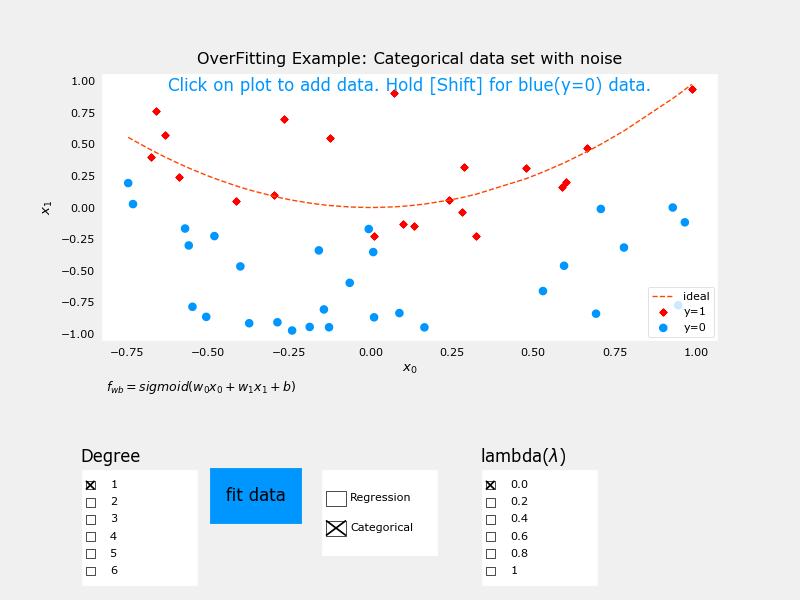

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from helpers.plt_overfit import overfit_example, output
plt.style.use('helpers/deeplearning.mplstyle')

plt.close("all")
display(output)
ofit = overfit_example(True)

# LAMBDA PARAMETER PRIKAZUJE NIVO KATEGORIZACIJE
# primer:
# Degree 6, Regressiong -> z lambda parametrom npr (lambda = 0.4) lahko ohranimo kompleksen model ampak povecamo regularizacijo in tako preprecimo overfitting

### Ridge regression (L2 regularizacija)

- Pomembno: Pred regularizacijo moramo opraviti feature scaling!
- v spodnjem primeru regularizacija daje metodi linearne regresije dodatne parametre, ki jih sama po sebi za fine-tunning nima

In [7]:
%matplotlib inline
plt.style.use('default')

from sklearn.linear_model import Ridge # importanje L2 regularizacije
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from helpers.datasets import load_extended_boston

# nalozimo dataset
X, y = load_extended_boston() 

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# iniclializiramo standard scaler
scaler = StandardScaler()
# fitamo samo train
scaler.fit(X_train)
# transformiramo train in test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge() # v tem primeru brez parametrov
ridge.fit(X_train_scaled, y_train)
print(f"Training set score: {ridge.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test_scaled, y_test):.2f}") # rezultat 78%

Training set score: 0.94
Test set score: 0.78


In [8]:
traning_scores = {}
testing_scores = {}

# parametre testiramo po logaritemski skali
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    traning_scores[alpha] = ridge.score(X_train_scaled, y_train)
    testing_scores[alpha] = ridge.score(X_test_scaled, y_test)

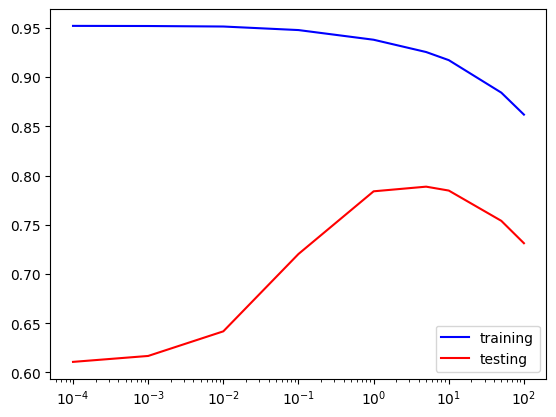

In [9]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

# MIN del
# ko zmanjsujemo alpha -> model je vedno bolj podoben navadni linearni regresiji, manj omejujemo nas model, je bolj kompleksen
# MID del
# ko povecujemo alpha -> zmanjsujemo sum, generaliziramo : iz tega razloga je training set vedno slabsi, testing pa se izboljsuje
# MAX del
# pri ekstremno velikih alpha -> smo prevec posplosili

# optimalen alpha parameter -> med 2.0 in 8.0

In [10]:
ridge10 = Ridge(alpha=0.001).fit(X_train_scaled, y_train)
print(f"Training set score: {ridge10.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test_scaled, y_test):.2f}")

Training set score: 0.95
Test set score: 0.62


In [11]:
ridge01 = Ridge(alpha=5).fit(X_train_scaled, y_train)
print(f"Training set score: {ridge01.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test_scaled, y_test):.2f}")

Training set score: 0.93
Test set score: 0.79


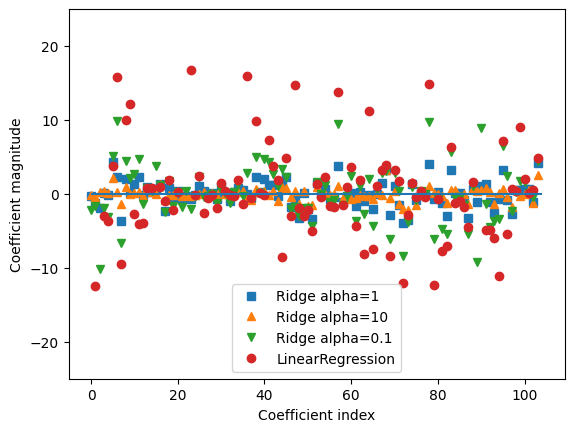

In [13]:
# graf prikazuje kako ridge vpliva na vpliv parametrov v linearni regresiji
# vecji kot je alpha manjsi je vpliv parametrov linearne regresije
from sklearn.linear_model import LinearRegression

ridge = Ridge().fit(X_train_scaled, y_train)
ridge10 = Ridge(alpha=10).fit(X_train_scaled, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train_scaled, y_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

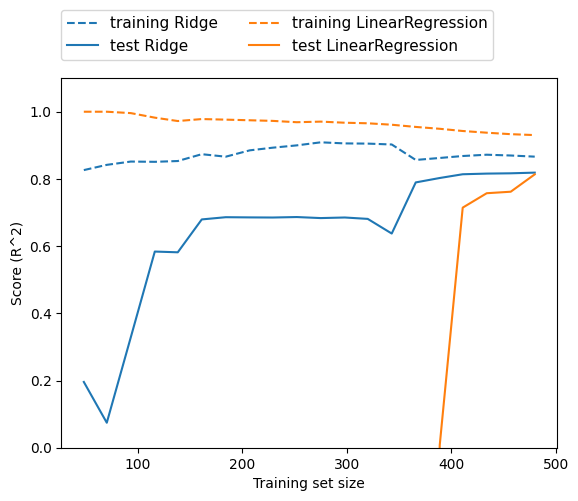

In [14]:
# SKLEP
# Ce povecujemo stevilo podatkov -> linearna regresija postaja vedno bolj tocna
# 1- iz tega sklepamo da pri ogromnem stevilu podatkov se linearna regresija dovolj dobro odreže - regulacija ni potrebna
# 2- regularizacija pomaga pri manjših setih podatkov

from helpers.plot_ridge_n_samples import plot_ridge_n_samples

plot_ridge_n_samples()
plt.show()

### Lasso Regression
**Poleg tega da zmanjšuje koeficiente (tako kot pri ridge-u), jih lasso lahko postavi tudi na 0 in jih izključi iz modela**

Na ta način -> lasso opravi izbiro značilk (feature selection)

In [16]:
X_train_scaled.shape

(379, 104)

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)

print(f"Training set score: {lasso.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}") # uporabljenih samo 6/379 značilk

Training set score: 0.79
Test set score: 0.67
Number of features used: 6


In [19]:
traning_scores = {}
testing_scores = {}

alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train)
    traning_scores[alpha] = lasso.score(X_train_scaled, y_train)
    testing_scores[alpha] = lasso.score(X_test_scaled, y_test)
    
# convergence warning -> model ni skonvergiral do konca, scikit vrne opzorilo.
# v praksi pride velikokrat do tega če podatkov ne scalamo, sedaj pride zato ker smo uporabili zelo male/velike alpha parametre

c:\Users\adminmatic\Documents\code_projects\python-analitika-2-notes\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


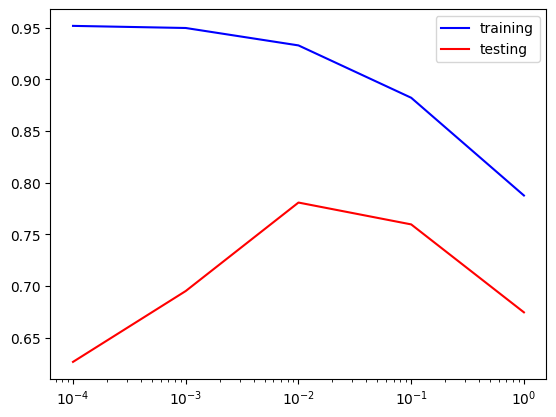

In [20]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

In [21]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.93
Test set score: 0.78
Number of features used: 61


In [22]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.63
Number of features used: 103


c:\Users\adminmatic\Documents\code_projects\python-analitika-2-notes\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


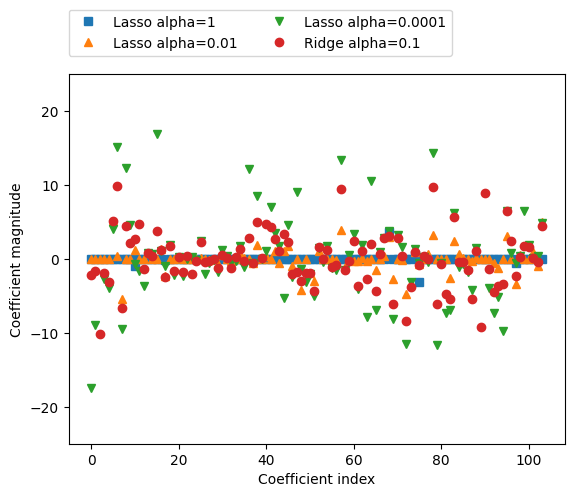

In [24]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

# aplpha = 1 -> odreže že praktično vse spremenljivke
# 
# V PRAKSI
# ridge - uporabimo najprej, ker je lahko bolj točen
# lasso - uporabimo lahko npr. za razumevanje pomembnosti značilk, ko analiziramo model

In [25]:
# TODO: Kaj je alpha parameter ? Zakaj ni vektorski? Kako lahko vpliva na več značil samo z eno skalarno vrednostjo

### Elastic Net Regression

**Gre za kombinacijo Ridge-Lasso regresije!**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [ ]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000).fit(X_train_scaled, y_train)
# l1_ratio -> koliko ridge ali lasso uporabimo
# aplha -> nivo parametra

print(f"Training set score: {e_net.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {e_net.score(X_test_scaled, y_test):.2f}")

## Strengths, weaknesses, and parameters

<img src="images/reg_12.png">

**Parameters**:
- The main parameter of linear models is the regularization parameter:
    - called `alpha` in the regression models
- Large values for alpha mean simple models. 
- In particular for the regression models, tuning these parameters is quite important. 
- Usually alpha is searched for on a logarithmic scale. 
- The other decision you have to make is whether you want to use **L1 regularization or L2 regularization**. 
    - If you assume that only a few of your features are actually important, you should use L1. 
    - Otherwise, you should default to L2.

**Strengths**:
- Linear models are **very fast** to train, and also fast to predict. 
- They **scale to very large datasets** and **work well with sparse data***. 
- Linear models often **perform well when the number of features is large compared to the number of samples**. 
- They are also often used on very large datasets, simply because it’s not feasible to train other models. 

**Weaknesses**:
- However, in lower-dimensional spaces, other models might yield better generalization performance.

Todo: najdi dodatne razlage
- https://www.youtube.com/watch?v=OEU22e20tWw